In [25]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats

In [26]:
#df = pd.read_csv('/root/bryton/github/cv_research/bryton/ml_sealice/2016.csv')
df = pd.read_csv('/root/bryton/github/cv_research/bryton/ml_sealice/combined_2016_2018.csv')


In [27]:
df
delicings = np.where(df['mechanicalRemoval'].isnull() == False)[0]

num_delicings = len(delicings)
num_site_weeks = len(df)

num_delicings / num_site_weeks

# Average time between delicings
# Number of delicings
# Pull specifically for Erko

0.05609444798978941

/usr/local/lib/python3.5/dist-packages/scipy/stats/_continuous_distns.py:437: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


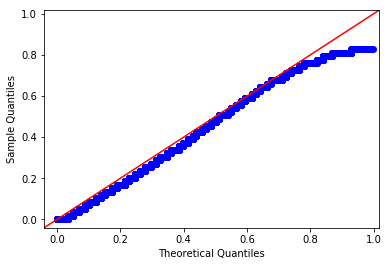

In [28]:
num = df.loc[df['avgAdultFemaleLice'] < 0.5, 'avgAdultFemaleLice']
#num = df.loc[df['avgMobileLice'] < 1.5, 'avgMobileLice']
#num = df.loc[df['avgStationaryLice'] < 0.5, 'avgStationaryLice']

dist = dist=stats.distributions.beta
res = num
#res = np.log(1 + num)

fig = sm.qqplot(res, dist=dist, fit=True, line='45')

plt.show()

In [29]:
dist= dist=stats.distributions.expon

id                                                45024
localityNo                                        11756
year                                               2016
week                                                  1
hasReportedLice                                    True
hasMechanicalRemoval                              False
hasBathTreatment                                  False
hasInFeedTreatment                                False
hasCleanerFishDeployed                            False
isFallow                                          False
avgAdultFemaleLice                                 0.47
avgMobileLice                                       1.2
avgStationaryLice                                  0.77
seaTemperature                                      7.4
bathTreatments                                       []
inFeedTreatments                                     []
cleanerFish                                         NaN
mechanicalRemoval                               

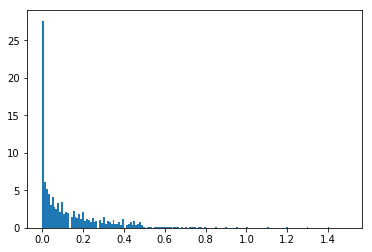

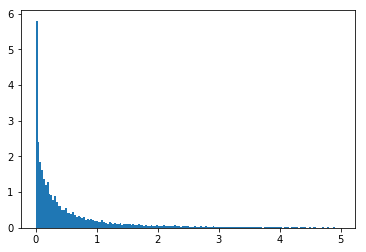

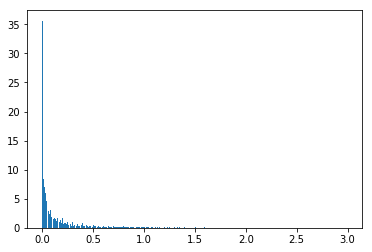

0.15155009572431397
0.07
0.6692331844288449
0.25
0.22883969368219528
0.04
0.00: 0.00, 0.00, 0.00
1.00: 0.00, 0.00, 0.00
2.00: 0.00, 0.00, 0.00
3.00: 0.00, 0.00, 0.00
4.00: 0.00, 0.00, 0.00
5.00: 0.00, 0.00, 0.00
6.00: 0.00, 0.00, 0.00
7.00: 0.00, 0.00, 0.00
8.00: 0.00, 0.00, 0.00
9.00: 0.00, 0.00, 0.00
10.00: 0.00, 0.00, 0.00
11.00: 0.00, 0.00, 0.00
12.00: 0.00, 0.01, 0.00
13.00: 0.00, 0.01, 0.00
14.00: 0.00, 0.01, 0.00
15.00: 0.00, 0.02, 0.00
16.00: 0.00, 0.02, 0.00
17.00: 0.00, 0.02, 0.00
18.00: 0.00, 0.03, 0.00
19.00: 0.00, 0.03, 0.00
20.00: 0.00, 0.04, 0.00
21.00: 0.00, 0.04, 0.00
22.00: 0.00, 0.05, 0.00
23.00: 0.00, 0.05, 0.00
24.00: 0.00, 0.05, 0.00
25.00: 0.00, 0.06, 0.00
26.00: 0.01, 0.07, 0.00
27.00: 0.01, 0.07, 0.00
28.00: 0.01, 0.08, 0.00
29.00: 0.01, 0.08, 0.00
30.00: 0.01, 0.09, 0.01
31.00: 0.01, 0.10, 0.01
32.00: 0.02, 0.10, 0.01
33.00: 0.02, 0.10, 0.01
34.00: 0.02, 0.11, 0.01
35.00: 0.02, 0.12, 0.01
36.00: 0.03, 0.13, 0.01
37.00: 0.03, 0.13, 0.02
38.00: 0.03, 0.14, 0.02


In [30]:
print(df.iloc[0])

plt.hist(df.loc[df['avgAdultFemaleLice'] < 1.5, 'avgAdultFemaleLice'], bins='auto', density=True)
plt.show()

plt.hist(df.loc[df['avgMobileLice'] < 5, 'avgMobileLice'], bins='auto', density=True)
plt.show()

plt.hist(df.loc[df['avgStationaryLice'] < 3, 'avgStationaryLice'], bins='auto', density=True)
plt.show()

print(np.mean(df['avgAdultFemaleLice']))
print(np.median(df['avgAdultFemaleLice']))

print(np.mean(df['avgMobileLice']))
print(np.median(df['avgMobileLice']))

print(np.mean(df['avgStationaryLice']))
print(np.median(df['avgStationaryLice']))

for i in range(0, 100, 1):
    p1 = np.percentile(df['avgAdultFemaleLice'], i) # return 50th percentile, e.g median.
    p2 = np.percentile(df['avgMobileLice'], i) # return 50th percentile, e.g median.
    p3 = np.percentile(df['avgStationaryLice'], i) # return 50th percentile, e.g median.
    print('%0.2f: %0.2f, %0.2f, %0.2f' % (i, p1, p2, p3))

In [32]:
#my_df = df.loc[:,'avgAdultFemaleLice':'seaTemperature']
my_df = df.loc[:,'hasReportedLice':'seaTemperature']

new_df = my_df.copy()
norm_df = my_df.copy()

for x in my_df.columns:
    my_mean = my_df[x].median()
    my_std = my_df[x].std()
    my_iqr = stats.iqr(my_df[x])
    
    my_row = my_df[x].copy()
    new_df[x] = my_row / my_iqr
    norm_df[x] = (my_row - my_mean) / my_std

In [33]:
#good_indices_1 = (my_df == 0).any(axis=1) == False
good_indices_2 = my_df['avgAdultFemaleLice'] < 1.5
good_indices_3 = my_df['avgMobileLice'] < 5
good_indices_4 = my_df['avgStationaryLice'] < 3

good_indices = good_indices_2 & good_indices_3 & good_indices_4

print(np.sum(good_indices) / len(good_indices))

my_df_X = new_df.filter(['avgAdultFemaleLice', 'avgMobileLice', 'seaTemperature', 'hasMechanicalRemoval', 'hasBathTreatment', 'hasInFeedTreatment', 'hasCleanerFishDeployed'], axis=1)
my_df_Y = new_df['avgStationaryLice'][good_indices]

my_df_X = my_df_X.loc[good_indices, :]

my_df_X = np.log(1 + my_df_X)
my_df_Y = my_df_Y
#my_df_Y = np.log(1 + my_df_Y)

my_df_X = np.hstack((my_df_X, my_df_X ** 2, np.log(1 + my_df_X)))

myX = sm.add_constant(my_df_X)
myY = np.log(1 + my_df_Y)

model = sm.OLS(myY, myX).fit()

res = model.resid
fig = sm.qqplot(res, dist=stats.distributions.norm, fit=True, line='45')

plt.show()

print(model.summary())

0.9757498404594767


/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:153: RuntimeWarning: invalid value encountered in reduce
  umr_maximum(a, axis, None, out, keepdims),
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in reduce
  umr_minimum(a, axis, None, None, keepdims),


MissingDataError: exog contains inf or nans

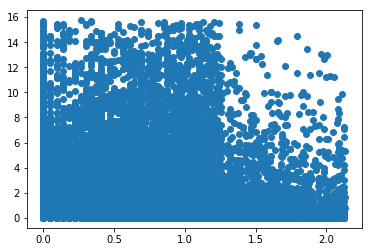

In [34]:
plt.scatter(my_df_X[:,0], my_df_Y)
plt.show()

In [35]:
predY = model.predict(myX)
error = predY - myY

avg_error = np.median(np.abs(error))

print(avg_error)

plt.scatter(myY, predY)
plt.xlabel('Actual stationary')
plt.ylabel('Predicted stationary')
plt.show()

ValueError: shapes (76450,22) and (10,) not aligned: 22 (dim 1) != 10 (dim 0)

None


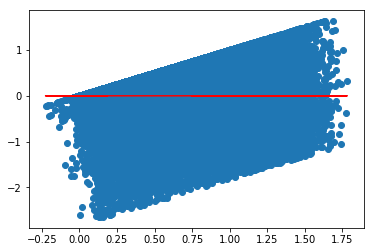

In [36]:
res_X = predY
res_Y = predY - myY

res_myX = sm.add_constant(res_X)
res_myY = res_Y

res_model = sm.OLS(res_myY, res_myX).fit_regularized(L1_wt=0)
res_predY = res_model.predict(res_myX)

print(res_model.summary())

plt.scatter(res_X, res_Y)
plt.plot(res_X, res_predY, color='red')
plt.show()

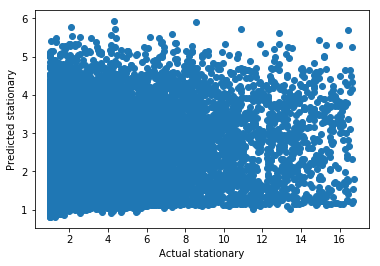

0.2807552127259906


In [37]:
plt.scatter(np.exp(myY), np.exp(predY))
plt.xlabel('Actual stationary')
plt.ylabel('Predicted stationary')
plt.show()

error = np.exp(predY) - np.exp(myY)

avg_error = np.median(np.abs(error))

print(avg_error)

In [38]:
# Trying a different model that is time-series based

       hasReportedLice  hasMechanicalRemoval  hasBathTreatment  \
0                 True                 False             False   
489               True                 False             False   
984               True                 False             False   
1484              True                  True             False   
1984              True                  True             False   
2474              True                 False             False   
2942              True                 False             False   
3413              True                 False             False   
3881              True                 False             False   
4333              True                 False             False   
4789              True                 False             False   
5245              True                 False             False   
5688              True                 False             False   
6154              True                 False             False   
6611      

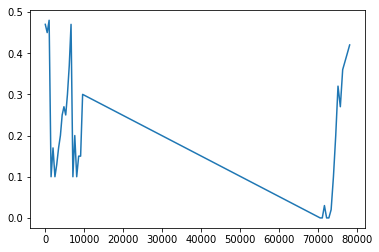

In [39]:
subset = my_df.loc[df['localityNo'] == 11756]

print(subset)

plt.plot(subset['avgAdultFemaleLice'])
plt.show()

In [40]:
print(subset.shape)

subset_v = subset.values
print(subset_v.shape)

diff = subset_v[1:21] - subset_v[0:20]

diff_myX = np.hstack((subset_v[1:21,0:1], subset_v[0:20,:]))
diff_myY = subset_v[1:21, 2]

diff_model = sm.OLS(diff_myY, diff_myX).fit()
diff_predY = diff_model.predict(diff_myX)

print(diff_model.summary())

plt.scatter(diff_myY, diff_predY)
plt.show()

(35, 10)
(35, 10)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [41]:
localityNumbers = np.unique(df['localityNo'])

In [42]:
# Original model

'''
all_diff_myX = None
all_diff_myY = None

for localityNo in localityNumbers:
    subset = my_df.loc[df['localityNo'] == localityNo]
    subset_v = subset.values
    num_obs = subset_v.shape[0]

    diff = subset_v[1:num_obs] - subset_v[0:(num_obs - 1)]
    
    diff_myX = np.hstack((subset_v[1:num_obs,0:2], subset_v[0:(num_obs - 1),0:3], (subset_v[1:num_obs,0:2] - subset_v[0:(num_obs - 1),0:2]) / subset_v[0:(num_obs - 1),0:2]))
    #diff_myY = subset_v[1:num_obs, 2]
    diff_myY = (subset_v[1:num_obs, 2] - subset_v[0:(num_obs - 1),2]) #/ subset_v[0:(num_obs - 1),2]
    
    if all_diff_myX is None:
        all_diff_myX = diff_myX
        all_diff_myY = diff_myY
    else:
        all_diff_myX = np.vstack((all_diff_myX, diff_myX))
        all_diff_myY = np.concatenate((all_diff_myY, diff_myY))
'''

"\nall_diff_myX = None\nall_diff_myY = None\n\nfor localityNo in localityNumbers:\n    subset = my_df.loc[df['localityNo'] == localityNo]\n    subset_v = subset.values\n    num_obs = subset_v.shape[0]\n\n    diff = subset_v[1:num_obs] - subset_v[0:(num_obs - 1)]\n    \n    diff_myX = np.hstack((subset_v[1:num_obs,0:2], subset_v[0:(num_obs - 1),0:3], (subset_v[1:num_obs,0:2] - subset_v[0:(num_obs - 1),0:2]) / subset_v[0:(num_obs - 1),0:2]))\n    #diff_myY = subset_v[1:num_obs, 2]\n    diff_myY = (subset_v[1:num_obs, 2] - subset_v[0:(num_obs - 1),2]) #/ subset_v[0:(num_obs - 1),2]\n    \n    if all_diff_myX is None:\n        all_diff_myX = diff_myX\n        all_diff_myY = diff_myY\n    else:\n        all_diff_myX = np.vstack((all_diff_myX, diff_myX))\n        all_diff_myY = np.concatenate((all_diff_myY, diff_myY))\n"

In [100]:
subset_v = my_df.loc[df['localityNo'] == localityNumbers[0]]
subset_v.iloc[1]

hasReportedLice            True
hasMechanicalRemoval      False
hasBathTreatment          False
hasInFeedTreatment        False
hasCleanerFishDeployed     True
isFallow                  False
avgAdultFemaleLice          0.3
avgMobileLice              1.35
avgStationaryLice          0.05
seaTemperature                7
Name: 710, dtype: object

In [101]:
subset_v.iloc[0]
subset_v.values[:,0:6]
#subset_v.values[:,6:10]

array([[True, False, False, False, False, False],
       [True, False, False, False, True, False],
       [True, False, False, False, False, False],
       [True, False, False, False, False, False],
       [True, False, False, False, False, False],
       [True, False, False, False, False, False],
       [True, False, False, False, False, False],
       [True, False, False, False, False, False],
       [True, False, False, False, False, False],
       [True, False, False, False, False, False],
       [True, False, False, False, False, False],
       [True, False, False, False, False, False],
       [True, False, False, False, False, False],
       [True, False, False, False, False, False],
       [True, False, False, False, False, False],
       [True, False, False, False, False, False],
       [True, False, False, True, False, False],
       [True, False, False, True, False, False],
       [True, False, False, False, False, False],
       [True, False, False, False, False, False],
   

In [137]:
# New model

all_diff_myX = None
all_diff_myY = None

for localityNo in localityNumbers:
    subset = my_df.loc[df['localityNo'] == localityNo]
    subset_r = subset.values[:,0:6]
    subset_v = subset.values[:,6:10]
    num_obs = subset_v.shape[0]
    
    if num_obs < 3:
        print('Not enough samples')
        continue
        
    diff_myX = []
    diff_myY = []
    
    for i in range(num_obs - 2):
        X = np.concatenate((subset_v[i+1,0:2], subset_v[i+1,0:2] * subset_v[i+1,3:4], subset_v[i+2,0:3], subset_v[i+2,0:3] * subset_v[i+2,3:4], subset_v[i,0:3], subset_v[i,0:3] * subset_v[i,3:4], subset_v[i,3:4]))
        Y = subset_v[i + 1, 2]
        
        if ( subset_r[i, 4] or  subset_r[i + 1, 4] or  subset_r[i + 2, 4]
            or subset_r[i, 1] or subset_r[i + 1, 1] or subset_r[i + 2, 1]
            or subset_r[i, 2] or subset_r[i + 1, 2] or subset_r[i + 2, 2]
            or subset_r[i, 3] or subset_r[i + 1, 3] or subset_r[i + 2, 3]):
            continue
        
        diff_myX.append(X)
        diff_myY.append(Y)
        
    if len(diff_myX) == 0:
        continue
        
    '''
    #diff = subset_v[1:num_obs] - subset_v[0:(num_obs - 1)]
    
    #diff_myX = np.hstack((subset_v[1:num_obs,0:4], subset_v[0:(num_obs - 1),0:2], subset_v[0:(num_obs - 1),3:4]))
    #diff_myX = np.hstack((subset_v[0:(num_obs - 1),0:4], subset_v[1:(num_obs),0:2], subset_v[1:(num_obs),3:4]))
    #diff_myX = np.hstack((subset_v[2:(num_obs),0:2], subset_v[2:(num_obs),3:4], subset_v[1:(num_obs - 1),0:4], subset_v[0:(num_obs - 2),0:4]))
    #diff_myX = np.hstack((subset_v[1:(num_obs - 1),0:2], subset_v[1:(num_obs - 1),3:4], subset_v[2:(num_obs - 0),0:4], subset_v[0:(num_obs - 2),0:4]))
    diff_myX = np.hstack((subset_v[1:(num_obs - 1),0:2], subset_v[1:(num_obs - 1),0:2] * subset_v[1:(num_obs - 1),3:4], subset_v[2:(num_obs - 0),0:3], subset_v[2:(num_obs - 0),0:3] * subset_v[2:(num_obs - 0),3:4], subset_v[0:(num_obs - 2),0:3], subset_v[0:(num_obs - 2),0:3] * subset_v[0:(num_obs - 2),3:4]))
    #diff_myX = np.hstack((subset_v[2:(num_obs - 1),0:2], subset_v[2:(num_obs - 1),3:4], subset_v[3:(num_obs - 0),0:4], subset_v[1:(num_obs - 2),0:4], subset_v[0:(num_obs - 3),0:4]))
    #diff_myY = subset_v[0:(num_obs - 1), 2]
    diff_myY = subset_v[1:(num_obs - 1), 2]
    #diff_myY = subset_v[2:(num_obs - 1), 2]
    #diff_myY = subset_v[2:(num_obs), 2]
    #diff_myY = (subset_v[1:num_obs, 2] - subset_v[0:(num_obs - 1),2]) #/ subset_v[0:(num_obs - 1),2]
    '''
    
    if all_diff_myX is None:
        all_diff_myX = diff_myX
        all_diff_myY = diff_myY
    else:
        all_diff_myX = np.vstack((all_diff_myX, diff_myX))
        all_diff_myY = np.concatenate((all_diff_myY, diff_myY))
        
        
print('done')

print(all_diff_myX.shape)
print(all_diff_myY.shape)

all_diff_myX = np.array(all_diff_myX, dtype=np.float64)

Not enough samples
Not enough samples
Not enough samples
Not enough samples
Not enough samples
Not enough samples
Not enough samples
Not enough samples
done
(50208, 17)
(50208,)


In [138]:
print('done')

#all_diff_myY[0]

done


0.31917224346717654
0
0
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     1390.
Date:                Sat, 16 Mar 2019   Prob (F-statistic):               0.00
Time:                        19:25:49   Log-Likelihood:                 7082.4
No. Observations:               16025   AIC:                        -1.413e+04
Df Residuals:                   16007   BIC:                        -1.399e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0

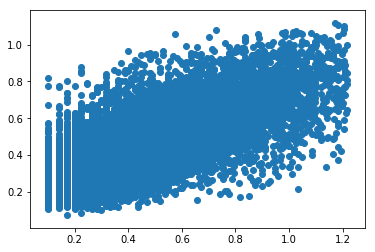

In [186]:
# Old
# AF: 0, 3, 7 < 1.5
# M: 1, 3, 8 < 5
# F: 5, 9 < 1.5

# New
# AF: 0, 2, 4, 7, 10, 13 < 1.5
# M: 1, 3, 5, 8, 11, 14 < 5
# F: 6, 9, 12, 15 < 1.5

AF_thresh = 1.5
M_thresh = 5
F_thresh = 1.5

# Adult female
gi_AF1 = all_diff_myX[:,0] < AF_thresh
#gi_AF2 = all_diff_myX[:,2] < AF_thresh
gi_AF2 = all_diff_myX[:,4] < AF_thresh
#gi_AF4 = all_diff_myX[:,7] < AF_thresh
gi_AF3 = all_diff_myX[:,10] < AF_thresh
#gi_AF6 = all_diff_myX[:,13] < AF_thresh
gi_AF4 = all_diff_myX[:,0] > 0.00001
#gi_AF8 = all_diff_myX[:,2] > 0.00001
gi_AF5 = all_diff_myX[:,4] > 0.00001
#gi_AF10 = all_diff_myX[:,7] > 0.00001
gi_AF6 = all_diff_myX[:,10] > 0.00001
#gi_AF12 = all_diff_myX[:,13] > 0.00001

# Moving
gi_M1 = all_diff_myX[:,1] < M_thresh
#gi_M2 = all_diff_myX[:,3] < M_thresh
gi_M2 = all_diff_myX[:,5] < M_thresh
#gi_M4 = all_diff_myX[:,8] < M_thresh
gi_M3 = all_diff_myX[:,11] < M_thresh
#gi_M6 = all_diff_myX[:,14] < M_thresh
gi_M4 = all_diff_myX[:,1] > 0.00001
#gi_M8 = all_diff_myX[:,3] > 0.00001
gi_M5 = all_diff_myX[:,5] > 0.00001
#gi_M10 = all_diff_myX[:,8] > 0.00001
gi_M6 = all_diff_myX[:,11] > 0.00001
#gi_M12 = all_diff_myX[:,14] > 0.00001

# Fixed
gi_F1 = all_diff_myX[:,6] < F_thresh
#gi_F2 = all_diff_myX[:,9] < F_thresh
gi_F2 = all_diff_myX[:,12] < F_thresh
#gi_F4 = all_diff_myX[:,15] < F_thresh
gi_F3 = all_diff_myY < F_thresh
gi_F4 = all_diff_myX[:,6] > 0.00001
#gi_F7 = all_diff_myX[:,9] > 0.00001
gi_F5 = all_diff_myX[:,12] > 0.00001
#gi_F9 = all_diff_myX[:,15] > 0.00001
gi_F6 = all_diff_myY > 0.00001


good_indices = gi_AF1 & gi_AF2 & gi_AF3 & gi_AF4 & gi_AF5 & gi_AF6
good_indices = good_indices & gi_M1 & gi_M2 & gi_M3 & gi_M4 & gi_M5 & gi_M6
good_indices = good_indices & gi_F1 & gi_F2 & gi_F3 & gi_F4 & gi_F5 & gi_F6

# Temperature
#gt_temp = all_diff_myX[:,3] < 15
#good_indices = good_indices & gt_temp
'''
# Adult female
gi_AF1 = all_diff_myX[:,0] < AF_thresh
gi_AF2 = all_diff_myX[:,3] < AF_thresh
gi_AF3 = all_diff_myX[:,7] < AF_thresh
gi_AF4 = all_diff_myX[:,0] > 0.00001
gi_AF5 = all_diff_myX[:,3] > 0.00001
gi_AF6 = all_diff_myX[:,7] > 0.00001

# Moving
gi_M1 = all_diff_myX[:,1] < M_thresh
gi_M2 = all_diff_myX[:,3] < M_thresh
gi_M3 = all_diff_myX[:,8] < M_thresh
gi_M4 = all_diff_myX[:,1] > 0.00001
gi_M5 = all_diff_myX[:,3] > 0.00001
gi_M6 = all_diff_myX[:,8] > 0.00001

# Fixed
gi_F1 = all_diff_myX[:,5] < F_thresh
gi_F2 = all_diff_myX[:,9] < F_thresh
gi_F3 = all_diff_myY < F_thresh
gi_F4 = all_diff_myX[:,5] > 0.00001
gi_F5 = all_diff_myX[:,9] > 0.00001
gi_F6 = all_diff_myY > 0.00001

good_indices = gi_AF1 & gi_AF2 & gi_AF3 & gi_AF4 & gi_AF5 & gi_AF6
good_indices = good_indices & gi_M1 & gi_M2 & gi_M3 & gi_M4 & gi_M5 & gi_M6
good_indices = good_indices & gi_F1 & gi_F2 & gi_F3 & gi_F4 & gi_F5 & gi_F6
'''

print(np.sum(good_indices) / len(good_indices))

all_filtered_myX = all_diff_myX[good_indices, :]
all_filtered_myY = all_diff_myY[good_indices]

print(np.sum(np.isinf(all_filtered_myX)))
print(np.sum(np.isinf(all_filtered_myY)))

all_myY = all_filtered_myY
all_myX = all_filtered_myX

#all_myX = np.log(1 + all_myX)
#all_myY = np.log(1 + all_myY)
all_myX = np.sqrt(all_myX)
all_myY = np.sqrt(all_myY)

all_myX = sm.add_constant(np.hstack((all_myX, ))) # 

all_diff_model = sm.OLS(all_myY, all_myX).fit()
all_predY = all_diff_model.predict(all_myX)

print(all_diff_model.summary())

plt.scatter(all_myY, all_predY)
#plt.scatter(all_myX, all_myY)
#plt.plot(all_myX, all_predY, 'r--')
plt.show()

In [184]:
'''
final_predY = all_predY#np.exp(all_predY) - 1
final_myY = all_myY#np.exp(all_myY) - 1

error = np.abs(final_predY - final_myY)

for i in range(0, 100, 5):
    p1 = np.percentile(error, i) # return 50th percentile, e.g median.
    p2 = np.percentile(final_predY, i) # return 50th percentile, e.g median.
    p3 = np.percentile(final_myY, i) # return 50th percentile, e.g median.
    print('%i: %0.3f, %0.2f, %0.2f' % (i, p1, p2, p3))
    
plt.scatter(all_myY, all_predY - all_myY)
plt.show()

'''

"\nfinal_predY = all_predY#np.exp(all_predY) - 1\nfinal_myY = all_myY#np.exp(all_myY) - 1\n\nerror = np.abs(final_predY - final_myY)\n\nfor i in range(0, 100, 5):\n    p1 = np.percentile(error, i) # return 50th percentile, e.g median.\n    p2 = np.percentile(final_predY, i) # return 50th percentile, e.g median.\n    p3 = np.percentile(final_myY, i) # return 50th percentile, e.g median.\n    print('%i: %0.3f, %0.2f, %0.2f' % (i, p1, p2, p3))\n    \nplt.scatter(all_myY, all_predY - all_myY)\nplt.show()\n\n"

0: 0.000, 0.000, 0.01, 0.02
2: 0.001, 0.020, 0.01, 0.03
4: 0.002, 0.037, 0.01, 0.03
6: 0.004, 0.058, 0.01, 0.03
8: 0.005, 0.076, 0.01, 0.03
10: 0.006, 0.096, 0.01, 0.03
12: 0.007, 0.117, 0.02, 0.04
14: 0.008, 0.135, 0.02, 0.04
16: 0.010, 0.154, 0.02, 0.04
18: 0.011, 0.174, 0.02, 0.04
20: 0.012, 0.194, 0.03, 0.04
22: 0.013, 0.212, 0.03, 0.04
24: 0.014, 0.232, 0.03, 0.05
26: 0.015, 0.250, 0.03, 0.05
28: 0.017, 0.270, 0.03, 0.05
30: 0.018, 0.291, 0.04, 0.05
32: 0.019, 0.309, 0.04, 0.05
34: 0.020, 0.328, 0.04, 0.05
36: 0.022, 0.347, 0.04, 0.06
38: 0.023, 0.368, 0.05, 0.06
40: 0.024, 0.389, 0.05, 0.06
42: 0.025, 0.411, 0.05, 0.06
44: 0.027, 0.431, 0.06, 0.06
46: 0.028, 0.453, 0.06, 0.06
48: 0.030, 0.474, 0.06, 0.07
50: 0.031, 0.496, 0.06, 0.07
52: 0.033, 0.521, 0.07, 0.07
54: 0.034, 0.543, 0.07, 0.07
56: 0.036, 0.566, 0.08, 0.08
58: 0.038, 0.592, 0.08, 0.08
60: 0.040, 0.618, 0.08, 0.08
62: 0.042, 0.643, 0.09, 0.08
64: 0.044, 0.669, 0.09, 0.08
66: 0.046, 0.699, 0.10, 0.09
68: 0.049, 0.728, 0

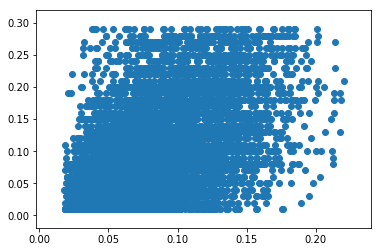

In [185]:
#final_predY = all_predY
#final_myY = all_myY
final_predY = all_predY ** 2
final_myY = all_myY ** 2

#final_predY = np.exp(all_predY) - 1
#final_myY = np.exp(all_myY) - 1

error = np.abs(final_predY - final_myY)

for i in range(0, 100, 2):
    p1 = np.percentile(error, i) # return 50th percentile, e.g median.
    p2 = np.percentile(2 * error / (final_myY + final_predY), i) # return 50th percentile, e.g median.
    p3 = np.percentile(final_myY, i) # return 50th percentile, e.g median.
    p4 = np.percentile(final_predY, i) # return 50th percentile, e.g median.
    print('%i: %0.3f, %0.3f, %0.2f, %0.2f' % (i, p1, p2, p3, p4))
    
plt.scatter(final_predY, final_myY)
plt.show()